# Illya-BOICHUK-Camp-2025

## Answer in task 1

In [1]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv('data/website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [2]:
print("Unique Theme values:", df['Theme'].unique())
light = df[df['Theme'] == 'Light Theme']['Conversion Rate'].dropna()
dark = df[df['Theme'] == 'Dark Theme']['Conversion Rate'].dropna()
print(f"Size Light: {len(light)}, std: {light.std():.4f}")
print(f"Size Dark: {len(dark)}, std: {dark.std():.4f}")
t_stat, p_value = ttest_ind(light, dark, equal_var=False)

print(f"\nt-statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Unique Theme values: ['Light Theme' 'Dark Theme']
Size Light: 486, std: 0.1372
Size Dark: 514, std: 0.1409

t-statistics: 0.4748
p-value: 0.6350


Dark and light website themes have the same effect on the number of conversions.

## Answer in task 2

In [3]:
import pandas as pd

df = pd.read_csv("data/insurance.csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print("\nUnique values for categorical variables:")
for col in ['sex', 'smoker', 'region']:
    print(f"{col}: {df[col].unique()}")


Unique values for categorical variables:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


In [5]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: found {len(outliers)} emissions")

age: found 0 emissions
bmi: found 9 emissions
children: found 0 emissions
charges: found 139 emissions


In [7]:
print("\nNumber of missing values:")
print(df.isnull().sum())
threshold = df['charges'].quantile(0.99)
df_clean = df[df['charges'] < threshold]
print(f"\nSize before cleaning: {df.shape}, after: {df_clean.shape}")


Number of missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Size before cleaning: (1338, 7), after: (1324, 7)


When analysing the data, I noticed that there were very large values in the charges column. This is not surprising, as medical costs are a typical area where a small number of patients may have extremely expensive procedures. Such costs are real, but they are significantly different from the average values in the sample.

These large values can have a significant impact on the results of the analysis. They will cause the average cost to be much higher than the typical value because of these few extreme cases. This can also make it difficult to build statistical models, as the model will try to adapt to the outliers, which will reduce its accuracy for normal observations.

To avoid problems, I decided to apply a percentile-based cleaning to keep only those observations with charges below the 99th percentile. This allows us to discard only the top 1% of the values, while retaining almost the entire sample. In addition, we do not change the values themselves, but simply remove the extreme ones, which reduces the risk of distorting the data.

## Answer in task 3

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import pingouin as pg
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
df.drop(['Unnamed: 0', 'id', ], axis=1, inplace=True)
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

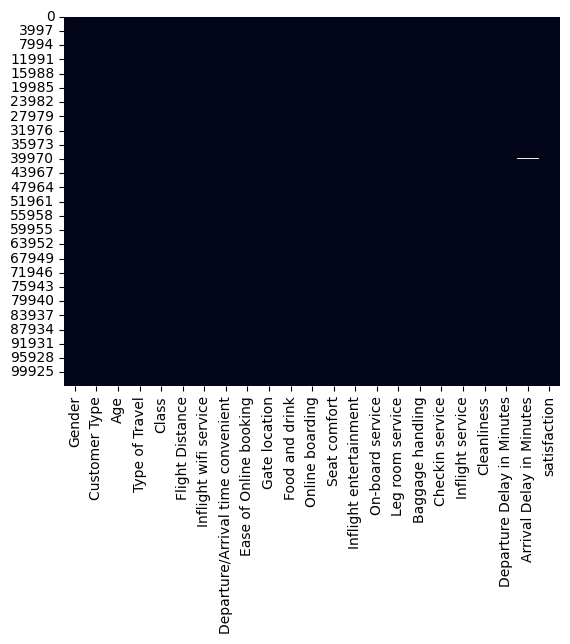

In [3]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

In [14]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)
print(df[df.duplicated()])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, satisfaction]
Index: []

[0 rows x 22 columns]


In [15]:
df['satisfaction'].describe()

count                      103904
unique                          2
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

In [16]:
eco = df[df['Class']=='Eco'][df.columns[6:20]].mean().mean()
eco_plus = df[df['Class']=='Eco Plus'][df.columns[6:20]].mean().mean()
business = df[df['Class']=='Business'][df.columns[6:20]].mean().mean()
print(eco, eco_plus, business)

3.067027795180539 3.0686835182431653 3.4301678388057124


In [17]:
df.groupby('Class')[df.columns[6:20]].mean()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
Eco,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
Eco Plus,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771


In [18]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

Text(0.5, 1.0, 'Neutral or dissatisfied per class')

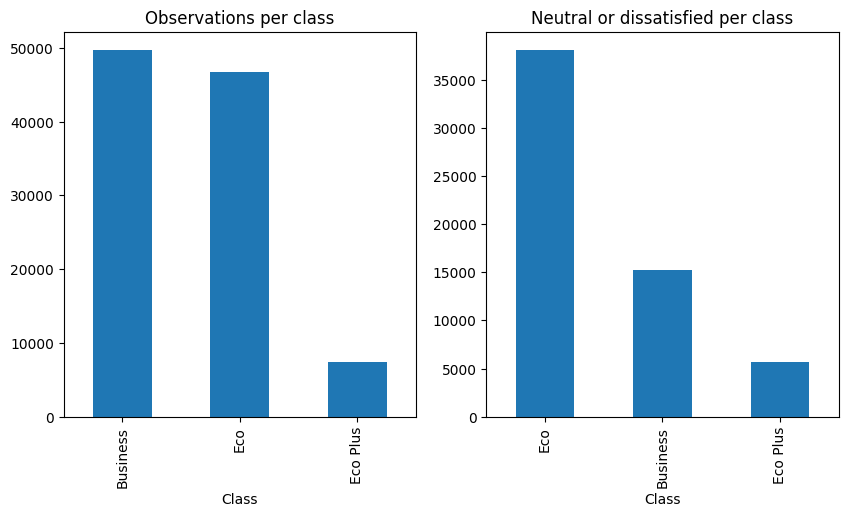

In [19]:
plt.subplot(1,2,1)
df.Class.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Observations per class')
plt.subplot(1,2,2)
df[df['satisfaction']==0].Class.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Neutral or dissatisfied per class') 

In [20]:
eco_proportion = len(df[df['Class']=='Eco'])/len(df)
bad_proportion = len(df[df['Class']=='Eco']['satisfaction']==0)/len(df[df['satisfaction']==0])
print(eco_proportion, bad_proportion)

0.449886433631044 0.7939163368943086


In [21]:
df[df['Class']=='Eco'][df.columns[6:20]].mean()

Inflight wifi service                2.675067
Departure/Arrival time convenient    3.199123
Ease of Online booking               2.605241
Gate location                        2.971954
Food and drink                       3.086277
Online boarding                      2.812985
Seat comfort                         3.138838
Inflight entertainment               3.098256
On-board service                     3.120355
Leg room service                     3.085720
Baggage handling                     3.450551
Checkin service                      3.122002
Inflight service                     3.463921
Cleanliness                          3.108097
dtype: float64

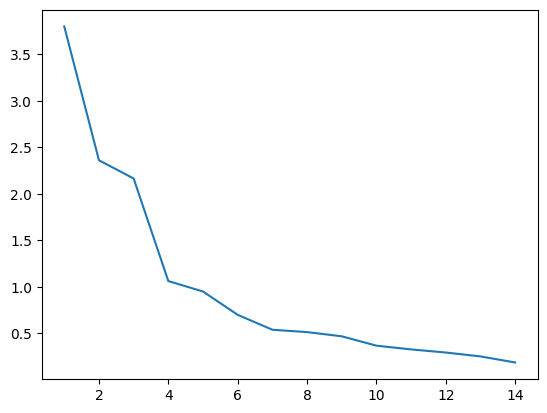

In [22]:
x =df[df.columns[6:20]] 
fa = FactorAnalyzer()
fa.fit(x, 10)
ev, v = fa.get_eigenvalues()
plt.plot(range(1,x.shape[1]+1),ev)

In [23]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.16826952  0.12827119  0.75809134]
 [-0.02950837  0.05968117  0.50138365]
 [ 0.03023106  0.02091436  0.93277526]
 [-0.0338282  -0.03231121  0.50404385]
 [ 0.75263893  0.01094635  0.00616734]
 [ 0.39545345  0.1138114   0.35906543]
 [ 0.78999048  0.08146326  0.02725824]
 [ 0.7456934   0.46674984  0.01203424]
 [ 0.09388069  0.70115382  0.02900913]
 [ 0.07445487  0.48144209  0.08065029]
 [ 0.02346305  0.76474833  0.02769279]
 [ 0.14351222  0.28418169  0.02888186]
 [ 0.01813146  0.79977083  0.01825226]
 [ 0.85842045  0.08814824 -0.00170807]]


In [26]:
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(f"{factor1_alpha};\n{factor2_alpha};\n{factor3_alpha}.")

(np.float64(0.8762877916624099), array([0.875, 0.878]));
(np.float64(0.7942916933090214), array([0.792, 0.796]));
(np.float64(0.7679754211110683), array([0.766, 0.77 ])).


The alphas are evaluated at 0.87, 0.79 and 0.76, which indicates that they are useful and coherent. We could use these new factors as variable for other analysis or for prediction. In this notebook, we will leave it at that.